In [3]:
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:0000:0100:01


Test R-squared (R2 Score): -0.03
Mean Absolute Error (MAE): 2.0154920426626055
Mean Squared Error (MSE): 10.76258613519913
Mean Absolute Percentage Error (MAPE): 2.88%
0.006583690643310547 s


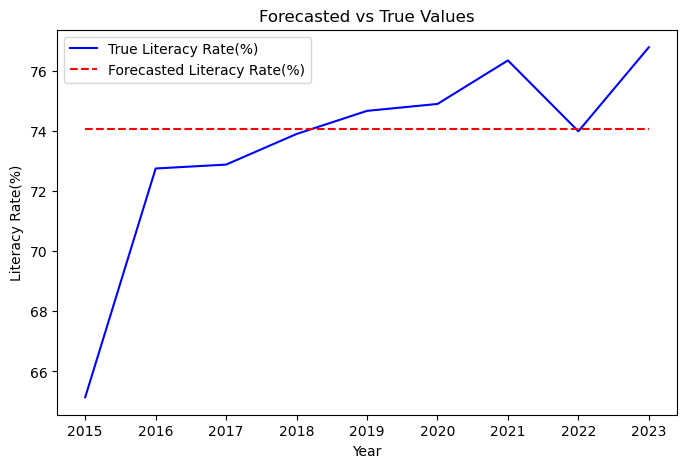

In [28]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Load your dataset
df = pd.read_csv('./processed_dataset_2.0.csv')

# Prepare the features (X) and target (y)
X = df.drop(columns=['Literacy Rate(%)'])  # Features
y = df['Literacy Rate(%)']  # Target

split_index = int(0.8 * len(df))

# Split the dataset into training and testing parts
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

# Train the model
start_time = time.time()
model = lgb.train(params, lgb_train, num_boost_round=100)
end_time = time.time()
duration = end_time - start_time
# Make predictions
y_pred_test = model.predict(X_test)+32

y_pred = y_pred_test
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y)) * 100

# Print evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_test = r2_score(y_test, y_pred_test)
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(duration, 's')

# Optionally, visualize the predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df['Year'][split_index:], y_test.values, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()